    Beginning the Regression Preparation

In [6]:

import pandas as pd

Building a Random Forest Model taking in Drug Claim Counts

In [7]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [15]:
ML_df = pd.read_csv("data\ML_df.csv")
specialty_df = pd.read_csv("data\specialty_df.csv")
#extract ML_df

In [9]:
ML_df.shape

(113430, 2195)

In [10]:
#ps_dd_df.shape


In [11]:
#ps_dd_df.isnull().any()

In [16]:
Labels = ML_df.columns[:specialty_df.columns.shape[0]-12].tolist() + ML_df.columns[specialty_df.columns.shape[0]:].tolist() #columns of drugs

In [19]:
X = ML_df[ML_df.columns[:specialty_df.columns.shape[0]-12].tolist() + ML_df.columns[specialty_df.columns.shape[0]:].tolist()].values
y = ML_df["generic_brand_ratio_cost"].values
print(X)
print(len(X))
print(len(y))
print(y)

[[0.00000000e+00 1.00300014e+09 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00300028e+09 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.00000000e+00 1.00300042e+09 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.13427000e+05 1.01396841e+09 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.13428000e+05 1.01396848e+09 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.13429000e+05 1.01396854e+09 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
113430
113430
[3.10621009 6.6769009  1.15503209 ... 1.78455293 2.93032883 2.22787557]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Split into Test and Train

In [21]:
#fit data into random forest regression
regressor = RandomForestRegressor( )
regressor.fit(X_train, y_train)

C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
print(regressor.feature_importances_)

[9.59370478e-04 1.73476176e-02 0.00000000e+00 ... 3.78580848e-07
 2.45150211e-06 5.73247608e-06]


In [23]:
coeff_df = pd.DataFrame( regressor.feature_importances_, Labels, columns=['Coefficient'])  
coeff_df = coeff_df[coeff_df["Coefficient"] != 0]
coeff_df.sort_values("Coefficient" ,ascending = False)

,Coefficient
CINRYZE,2.518630e-01
HARVONI,2.434709e-01
log_generic_cost,1.315873e-01
ALECENSA,4.087909e-02
npi,1.734762e-02
x0_Pulmonary Disease,1.414977e-02
ADEMPAS,1.365856e-02
KALYDECO,1.365040e-02
ZEPATIER,1.297067e-02
x0_Hematology-Oncology,1.182565e-02


In [24]:
y_pred = regressor.predict(X_test)

In [25]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(25)


,Actual,Predicted
0,3.309735,3.777555
1,3.469858,3.469858
2,24.756496,24.756496
3,1.738090,1.944791
4,0.389519,0.424205
5,0.683460,1.706874
6,2.507610,2.417738
7,7.456926,7.456926
8,2.618966,2.618966
9,333.775649,333.775649


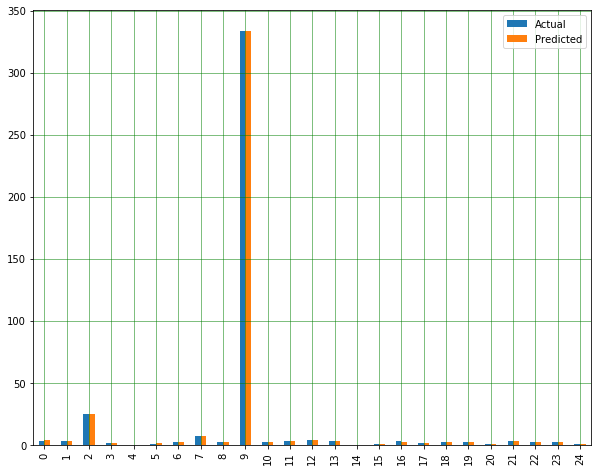

In [26]:
comparison_df.iloc[0:25].plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [27]:
print("r Squared:", metrics.r2_score(y_test, y_pred))

r Squared: 0.9885903676798203


Save the Trained Model

In [31]:
from sklearn.externals.joblib import dump,load

In [32]:
dump(regressor, "RFR.joblib") 

['RFR.joblib']